In [1]:
import pandas as pd


# Substitute the path_to_file content by the path to your csv file 
path_to_file = r"C:\Users\lenovo\Desktop\4433f22276T33\hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv"
# '../../datasets/dbscan/dbscan-with-python-and-scikit-learn-shopping-data.csv'
customer_data = pd.read_csv(path_to_file)


In [2]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
#We can also check if the data needs any more preprocessing aside from scaling
#by seeing if the type of data is consistent and verifying if there are any missing values that need to be treated by executing Panda's info() method
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.shape


(200, 5)

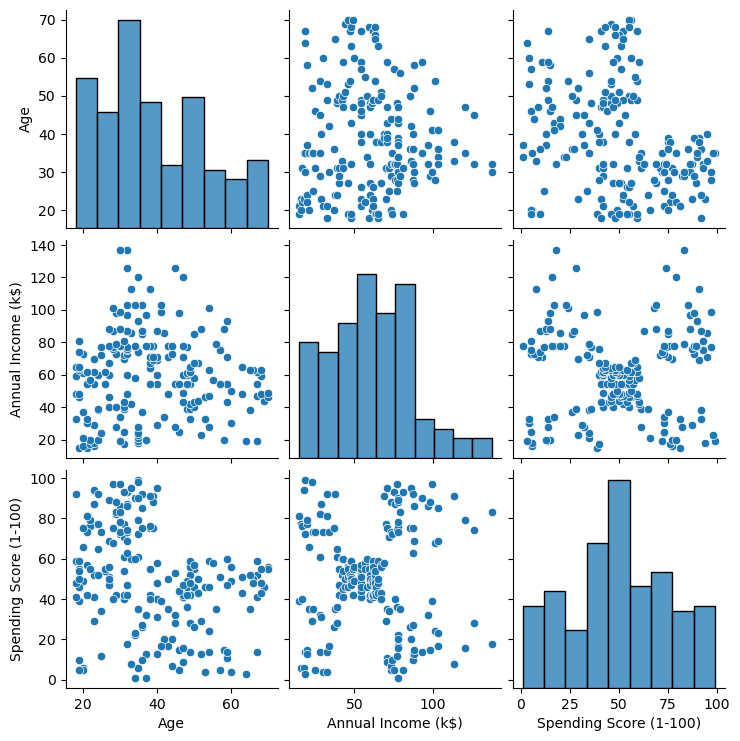

In [6]:
import seaborn as sns

# dropping CustomerID column from data 
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data);


In [7]:
#It can be noticed that there are certainly five groups with features of anual income and spending score
#those two features will be used as our selected columns

selected_cols = ['Annual Income (k$)', 'Spending Score (1-100)']
customer_data = customer_data[selected_cols]


In [10]:
# data scaling to a predefined scalar and standards
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # creating the scaler to fit our data
scaled_data = ss.fit_transform(customer_data)


In [11]:
#print the content of our scaled preprocessed data
scaled_customer_data = pd.DataFrame(columns=selected_cols, data=scaled_data)
scaled_customer_data.head()


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# DBSCAN clustering alogrithm

Choosing Min. Samples and Epsilon
To choose the minimum number of points for DBSCAN clustering, there is a rule of thumb, which states that it has to be equal or higher than the number of dimensions in the data plus one, as in:

min. points>=data dimensions+1


To choose the value for ε there is a method in which a Nearest Neighbors algorithm is employed to find the distances of a predefined number of nearest points for each point. This predefined number of neighbors is the min. points we have just chosen minus 1. So, in our case, the algorithm will find the 5-1, or 4 nearest points for each point of our data. those are the k-neighbors and our k equals 4.


k-neighbors=min. points−1


In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nn = NearestNeighbors(n_neighbors=4) # minimum points -1
nbrs = nn.fit(scaled_customer_data)
distances, indices = nbrs.kneighbors(scaled_customer_data)


In [27]:
distances = np.sort(distances, axis=0)


In [28]:
distances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03816943, 0.03816943,
       0.03816943, 0.03816943, 0.03816943, 0.03816943, 0.03816943,
       0.03816943, 0.03816943, 0.03816943, 0.03816943, 0.03816943,
       0.03816943, 0.03816943, 0.03816943, 0.03816943, 0.03882156,
       0.03882156, 0.03882156, 0.03882156, 0.03882156, 0.03882156,
       0.03882156, 0.03882156, 0.03882156, 0.03882156, 0.03882156,
       0.03882156, 0.03882156, 0.03882156, 0.03882156, 0.03882156,
       0.03882156, 0.03882156, 0.03882156, 0.03882156, 0.03882156,
       0.03882156, 0.03882156, 0.03882156, 0.03882156, 0.03882156,
       0.03882156, 0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 ,
       0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 ,
       0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 ,
       0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 ,
       0.0544428 , 0.0544428 , 0.0544428 , 0.0544428 , 0.05444

In [30]:
type(distances)


numpy.ndarray

In [32]:
distances.ndim

1

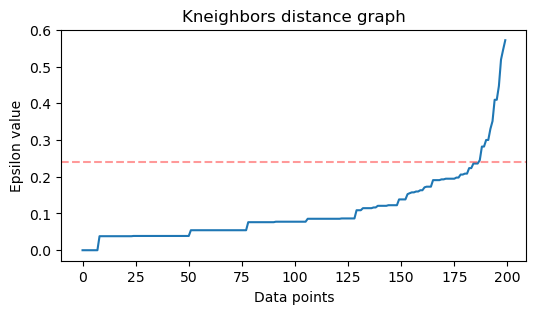

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=0.24, color='r', linestyle='--', alpha=0.4) # elbow line
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show();


In [34]:
#to extract specific coloumns values from a 1-D arrays as follows

data = np.array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
                 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
                 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

subset = data[:, 1:6:2] 
print(subset)

[[ 1  3  5]
 [11 13 15]
 [21 23 25]
 [31 33 35]]



# Creating a DBSCAN Model

In [36]:
#training our model
from sklearn.cluster import DBSCAN

# min_samples == minimum points ≥ dataset_dimensions + 1
dbs = DBSCAN(eps=0.24, min_samples=5)
dbs.fit(scaled_customer_data)


DBSCAN(eps=0.24)

In [38]:
labels = dbs.labels_

#adding new coloumn called labels for our model
scaled_customer_data['labels'] = labels
scaled_customer_data.head()


,Annual Income (k$),Spending Score (1-100),labels
0,-1.738999,-0.434801,-1
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,-1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,-1


In [39]:
# labels with -1 values; these are the noise points, the ones that don't belong to any cluster.
# finding out how many noise data points there is
labels_list = list(scaled_customer_data['labels'])
n_noise = labels_list.count(-1)
print("Number of noise points:", n_noise)

Number of noise points: 62


In [40]:
#observing number of labeled data points as not outliers
total_labels = np.unique(labels)
n_labels = 0
for n in total_labels:
    if n != -1:
        n_labels += 1
print("Number of clusters:", n_labels)


Number of clusters: 6


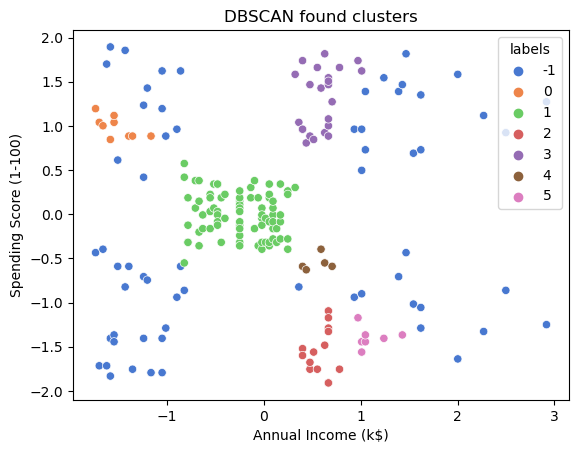

In [45]:
#plotting our model
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=scaled_customer_data, 
                x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='labels', palette='muted').set_title('DBSCAN found clusters');
plt.show()

In [46]:
scaled_customer_data

,Annual Income (k$),Spending Score (1-100),labels
0,-1.738999,-0.434801,-1
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,-1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,-1
...,...,...,...
195,2.268791,1.118061,-1
196,2.497807,-0.861839,-1
197,2.497807,0.923953,-1
198,2.917671,-1.250054,-1


# Evaluate the model

To evaluate DBSCAN we will use the silhouette score which will take into consideration the distance between points of a same cluster and the distances between clusters.



In [47]:
from sklearn.metrics import silhouette_score

s_score = silhouette_score(scaled_customer_data, labels)
print(f"Silhouette coefficient: {s_score:.3f}")


Silhouette coefficient: 0.506


testing and evaluting the model using HDVSCAN evaulation assessment
Note: Currently, most clustering metrics aren't really fitted to be used to evaluate DBSCAN because they aren't based on density. 
Here, we are using the silhouette score because it is already implemented in Scikit-learn and because it tries to look at cluster shape.
